# Neural Networks - Image Recognition 

In [12]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
import numpy as np

In [13]:
import matplotlib.pyplot as  plt
%matplotlib inline

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [14]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


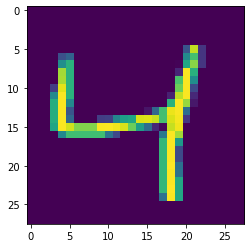

In [15]:
plt.imshow(x_train[2])

In [16]:
import numpy as np
np.max(x_train[2])

255

In [17]:
y_train[2]

4

In [18]:
28*28

784

In [19]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [20]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

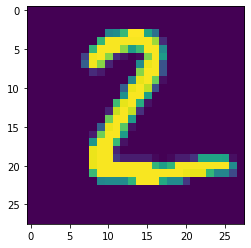

In [22]:
plt.imshow(x_test[1].reshape(28,28))

In [27]:
keras.utils.to_categorical(y_train)[0]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [24]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [28]:
batch_size = 128
num_classes = 10
epochs = 20


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


2022-11-07 20:04:38.520316: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.2448 - accuracy: 0.9249 - val_loss: 0.0933 - val_accuracy: 0.9707
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1019 - accuracy: 0.9689 - val_loss: 0.0815 - val_accuracy: 0.9768
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0735 - accuracy: 0.9775 - val_loss: 0.0885 - val_accuracy: 0.9755
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0616 - accuracy: 0.9812 - val_loss: 0.0712 - val_accuracy: 0.9803
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0508 - accuracy: 0.9841 - val_loss: 0.0843 - val_accuracy: 0.9783
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0443 - accuracy: 0.9869 - val_loss: 0.0863 - val_accuracy: 0.9796
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0387 - accuracy: 0.9883 - val_loss: 0.0835 - val_accuracy: 0.9803
E

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [29]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [30]:
batch_size = 128
num_classes = 10
epochs = 12


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 104s 221ms/step - loss: 2.2734 - accuracy: 0.1612 - val_loss: 2.2393 - val_accuracy: 0.3215
Epoch 2/12
469/469 [==============================] - 82s 175ms/step - loss: 2.2208 - accuracy: 0.2584 - val_loss: 2.1742 - val_accuracy: 0.4802
Epoch 3/12
469/469 [==============================] - 75s 160ms/step - loss: 2.1532 - accuracy: 0.3484 - val_loss: 2.0864 - val_accuracy: 0.5899
Epoch 4/12
469/469 [==============================] - 83s 178ms/step - loss: 2.0611 - accuracy: 0.4292 - val_loss: 1.9663 - val_accuracy: 0.6727
Epoch 5/12
469/469 [==============================] - 107s 227ms/step - loss: 1.9404 - accuracy: 0.4971 - val_loss: 1.8103 - val_accuracy: 0.7220
Epoch 6/12
469/469 [==============================] - 105s 223ms/step - loss: 1.7912 - accuracy: 0.5525 - val_loss: 1.6215 - val_accuracy: 0.7579
Epoch 7/12
469/469 [==============================] - 103s 219ms/step - loss: 1.6196 - accuracy: 0.5976 - val_loss: 1.4161 - va

In [34]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7489230632781982
Test accuracy: 0.8352000117301941


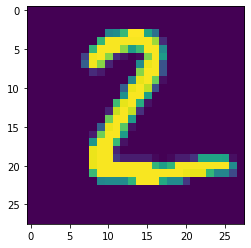

In [35]:
plt.imshow(x_test[1].reshape(28,28))

In [32]:
model.predict(x_test[0:1]), y_test[:1]

1/1 [==============================] - 1s 620ms/step


(array([[0.0137302 , 0.0053071 , 0.0127843 , 0.01633106, 0.0136677 ,
         0.00376638, 0.00344631, 0.85706645, 0.01894618, 0.05495429]],
       dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32))

In [61]:
model.predict_classes(x_test[0:1]), y_test[:1]

1/1 [==============================] - 0s


(array([7]), array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]]))